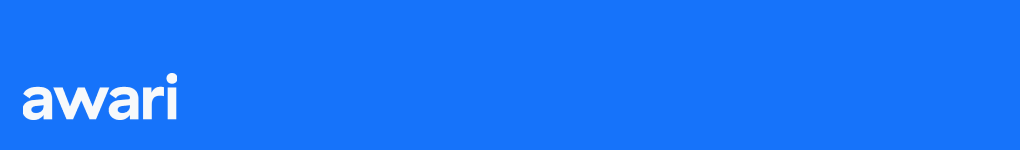

Prática da **Aula 15: Machine Learning V**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Métricas de Classificação e Regressão**

## **Objetivo**

Nesta prática, iremos comentar e demonstrar algumas métricas para modelos de Classificação e Regressão.

Após o processo de *feature engineering* (engenharia de recursos ou "ajuste das variáveis"), de implementarmos um modelo e obtermos saídas em forma de probabilidades ou classe, a próxima necessidade é entender o quão eficaz o modelo é, baseado em alguma métrica.

É importante conhecer métricas e saber como usá-las para saber se os resultados entregues pelo modelo estão sendo satisfatórios ou não.

Esta página do [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html) fornece uma boa referência sobre o assunto.

## **Prática**

### **Visão geral**

**Métricas de Classificação:**

- Accuracy.
- Logarithmic Loss.
- ROC, AUC.
- Confusion Matrix.
- Classification Report.

**Métricas de Regressão:**

- Mean Absolute Error. MAE
- Mean Squared Error. MSE
- Root Mean Squared Error. RMSE
- Root Mean Squared Logarithmic Error. RMSLE
- R Square.
- Adjusted R Square.

Em **problemas de classificação**, usamos dois tipos de algoritmos (dependendo do tipo de saída que ele cria):

- **Saída de classe**: Algoritmos como SVM e KNN criam uma saída de classe. Por exemplo, em um problema de classificação binária, as saídas serão 0 ou 1. Os algoritmos do SKLearn/Outros podem converter essas saídas de classe em probabilidade.

- **Saída de probabilidade**: Algoritmos como Regressão Logística, Floresta Aleatória, Aumento de Gradiente, Adaboost etc. fornecem saídas de probabilidade. As saídas de probabilidade podem ser convertidas em saídas de classe criando uma probabilidade limite.

Em **problemas de regressão**, a saída é sempre contínua por natureza e não requer tratamento adicional.

### **Métricas de Classificação**

Vamos usar o dataset [diabetes.csv](diabetes.csv) referente a dados deste tipo de doença para nossa prática. Faça upload do mesmo para o seu Google Drive, para poder importá-lo a seguir.

A avaliação será feita por `Logistic Regression`, `SGDClassifier` e `RandomForestClassifier`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

X =  diabetes_data.drop(["Outcome"],axis = 1)
y = diabetes_data["Outcome"]

In [ ]:
diabetes_data.shape

In [ ]:
diabetes_data.head()

In [ ]:
# Treinando vários modelos com vários hiperparâmetros usando o conjunto de treinamento, selecione o modelo e os hiperparâmetros que apresentam melhor desempenho no conjunto de validação.
# Uma vez que o tipo de modelo e os hiperparâmetros tenham sido selecionados, treinamos o modelo final usando esses hiperparâmetros no conjunto de treinamento completo, o erro generalizado é finalmente medido no conjunto de teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 56)


In [ ]:
# StratifiedKFold class realiza amostragem estratificada para produzir dobras"folds" que contêm uma proporção representativa de cada classe.
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state = 76)

### Treinando diversos modelos

In [ ]:
# Logistic Regression - Regressão Logística
clf_logreg = LogisticRegression()
# fit model - treino do modelo
clf_logreg.fit(X_train, y_train)
# Previsões de classe para o conjunto de validação.
y_pred_class_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv)
# probabilidades previstas para a classe 1, probabilidades da classe positiva
y_pred_prob_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv, method="predict_proba")
y_pred_prob_logreg_class1 = y_pred_prob_logreg[:, 1]


In [ ]:
# Random Forest Classifier
clf_rfc = RandomForestClassifier()
# fit model - treino
clf_rfc.fit(X_train, y_train)
# Previsões de classe para o conjunto de validação.
y_pred_class_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv)
# probabilidades previstas para a classe 1
y_pred_prob_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv, method="predict_proba")
y_pred_prob_rfc_class1 = y_pred_prob_rfc[:, 1]

In [ ]:
# SGD Classifier
clf_SGD = SGDClassifier()
# fit model - treino
clf_SGD.fit(X_train, y_train)
# Previsões de classe para o conjunto de validação.
y_pred_class_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv)
# probabilidades previstas para a classe 1
y_pred_prob_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv, method="decision_function")

**Nota rápida**: `predict_log_proba` do Scikit-Learn dá o logaritmo das probabilidades. Isso é mais prático porque as probabilidades podem tornar-se muito, muito pequenas.

#### **Acurácia nula**

- Precisão que poderia ser alcançada prevendo sempre a classe mais frequente.
- Isso significa que um modelo "burro" que sempre prevê 0/1 estaria certo "null_accuracy" % das vezes.

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np

class BaseClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

base_clf = BaseClassifier()
cross_val_score(base_clf, X_train, y_train, cv=10, scoring="accuracy").mean()


#### **Classification Accuracy** ou **Acurácia**

*Classification Accuracy* ou Acurácia é a razão entre o número de previsões corretas e o número total de amostras de entrada.

$$Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions\ made} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Quando usar esta métrica?**

Quando há um número aproximado de amostras pertencentes a cada classe.

**Quando não usar?**

Quando apenas uma classe detém a maioria das amostras.

**Exemplo:** considere que há 98% de amostras da classe A e 2% das amostras da classe B em nosso conjunto de treinamento. Então nosso modelo pode facilmente obter 98% de precisão de treinamento simplesmente prevendo cada amostra de treinamento pertencente à classe A.

Quando o mesmo modelo é testado em um conjunto de teste com 60% de amostras de classe A e 40% de amostras de classe B, a precisão do teste cairia para 60%. A precisão da classificação pode nos dar a falsa sensação de alcançar alta precisão.

In [ ]:
# calculate accuracy

acc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'accuracy').mean()

acc_logreg, acc_SGD, acc_rfc

#### **Logarithmic Loss / Log Loss / Logistic Loss / Cross-Entropy Loss** (perda logarítmica)

- Ao trabalhar com Log Loss, o classificador deve atribuir probabilidade a cada classe para todas as amostras.
- Log loss mede a INCERTEZA das probabilidades do modelo comparando-as com os rótulos verdadeiros e penalizando as classificações falsas.
- A perda de log é definida apenas para dois ou mais rótulos.
- Log Loss diminui gradualmente à medida que a probabilidade prevista melhora, portanto Log Loss mais próximo de 0 indica maior precisão, Log Loss longe de 0 indica menor precisão.
- Log Loss existe na faixa (0, ∞].

Suponha que existam N amostras pertencentes a M classes, então o Log Loss é calculado como abaixo:

$$ Log\ Loss = \frac{-1}{N} \sum_{i=1}^{N} \sum_{i=1}^{M}  y_{ij} * \log(\hat{y_{ij}})$$

Onde,

- $y_{ij}$, indica se a amostra i pertence à classe j ou não

- $p_{ij}$, indica a probabilidade da amostra i pertencer à classe j


O sinal negativo nega a saída $\log(\hat{y_{ij}})$ que é sempre negativa. $\hat{y_{ij}}$ gera uma probabilidade (0 - 1), $\log(x)$ é negativo se 0 < x < 1.

<b>Exemplo </b>: deixe que os rótulos de treinamento sejam 0 e 1, mas nossas previsões de treinamento sejam 0,4, 0,6, 0,89 etc. Para calcular uma medida do erro do nosso modelo, podemos classificar todas as observações com valores > 0,5 em 1 .Mas, ao fazê-lo, corremos um alto risco de aumentar a classificação incorreta. Isso ocorre porque pode acontecer que muitos valores com probabilidades 0,4, 0,45, 0,49 possam ter um valor verdadeiro de 1.

É aqui que o logLoss entra em cena.

Agora vamos seguir de perto a fórmula de LogLoss. Pode haver 4 casos principais para os valores de $y_{ij}$ e $p_{ij}$

- Caso 1: $y_{ij}$=1, $p_{ij}$ = Alto

- Caso 2: $y_{ij}$=1, $p_{ij}$ = Baixo

- Caso 3: $y_{ij}$=0, $p_{ij}$ = Baixo

- Caso 4: $y_{ij}$=0, $p_{ij}$ = Alto

**Como o LogLoss mede a incerteza?**

Se tivermos mais Caso 1 e Caso 3, então a soma (e média) dentro da fórmula de logloss seria maior e seria substancialmente maior em comparação com o que teria sido se o Caso 2 e o Caso 4 fossem adicionados. Agora esse valor é o maior possível do Caso 1 e do Caso 3, o que indica uma boa previsão. Se o multiplicarmos por (-1) , tornaremos o valor o menor possível. Isso agora significaria intuitivamente - Quanto menor o valor, melhor é o modelo, ou seja, menor o logloss, melhor é o modelo, ou seja, menor a incerteza, melhor é o modelo.

In [ ]:
# calculate logloss

logloss_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
logloss_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()

# SGDClassifier's hinge loss doesn't support probability estimates.
# We can set SGDClassifier as the base estimator in Scikit-learn's CalibratedClassifierCV, which will generate probability estimates.

from sklearn.calibration import CalibratedClassifierCV

new_clf_SGD = CalibratedClassifierCV(clf_SGD)
new_clf_SGD.fit(X_train, y_train)
logloss_SGD = cross_val_score(new_clf_SGD, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()

logloss_logreg, logloss_SGD, logloss_rfc

#### **ROC Curve** ou **Curva ROC**

ROC pode ser dividido em sensibilidade e especificidade. Escolher o melhor modelo é uma espécie de equilíbrio entre prever 1's com precisão ou 0's com precisão. Em outras palavras, sensibilidade e especificidade.

- **True Positive Rate (Sensibilidade/Recall):** A True Positive Rate é definida como TP/ (FN+TP). True Positive Rate corresponde à proporção de pontos de dados positivos que são corretamente considerados positivos, com relação a todos os pontos de dados positivos.

- **Taxa de falsos positivos (Especificidade):** A taxa de falsos positivos é definida como FP / (FP+TN). Taxa de falsos positivos corresponde à proporção de pontos de dados negativos que são erroneamente considerados positivos, em relação a todos os pontos de dados negativos.

Taxa de verdadeiro positivo e taxa de falso positivo têm valores no intervalo [0, 1]. Ambos TPR e FPR são calculados em valores de limiar como (0,00, 0,02, 0,04, …., 1,00) e um gráfico é desenhado.

In [ ]:
# IMPORTANTE: primeiro argumento são valores verdadeiros, segundo argumento são probabilidades previstas

# passamos y_test e y_pred_prob
# não usamos y_pred_class, pois dará resultados incorretos sem gerar erro
# roc_curve retorna 3 objetos taxa de falso positivo (fpr), taxa de verdadeiro positivo (tpr), limites

fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_train, y_pred_prob_logreg_class1)
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_train, y_pred_prob_rfc_class1)
fpr_SGD, tpr_SGD, thresholds_SGD = metrics.roc_curve(y_train, y_pred_prob_SGD)

plt.plot(fpr_logreg, tpr_logreg, label="logreg")
plt.plot(fpr_rfc, tpr_rfc, label="rfc")
plt.plot(fpr_SGD, tpr_SGD, label="SGD")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

**Interpretando o gráfico ROC**

Interpretar o gráfico ROC é muito diferente de um gráfico de linha regular. Porque, embora haja um eixo X e um eixo Y, não o lemos como: para um valor X de 0,25, o valor Y é 0,9.

Em vez disso, o que temos aqui é uma linha que traça o corte de probabilidade de 1 no canto inferior esquerdo a 0 no canto superior direito.

Essa é uma maneira de analisar como a sensibilidade e a especificidade se comportam para toda a faixa de pontos de corte de probabilidade, ou seja, de 0 a 1.

Idealmente, se tivermos um modelo perfeito, todos os eventos terão uma pontuação de probabilidade de 1 e todos os não eventos terão uma pontuação de 0. Para tal modelo, a área sob o ROC será um perfeito 1.

Assim, se traçarmos a curva a partir do canto inferior esquerdo, o valor de corte de probabilidade diminui de 1 para 0. Se tivermos um bom modelo, mais eventos reais devem ser previstos como eventos, resultando em alta sensibilidade e baixo FPR. Nesse caso, a curva subirá abruptamente cobrindo uma grande área antes de atingir o canto superior direito.

Portanto, quanto maior a área sob a curva ROC, melhor é o modelo.

A curva ROC é a única métrica que mede o desempenho do modelo para diferentes valores de pontos de corte de probabilidade de previsão.


In [ ]:
# define uma função que aceita um limite(threshold) e imprime sensibilidade e especificidade
def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    print('Sensitivity:', tpr[clf_threshold > threshold][-1])
    print('Specificity:', 1 - fpr[clf_threshold > threshold][-1])

### Avalidando diferentes modelos

In [ ]:
# Logistic Regression - Regressão Logística
evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.2), evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.8)

In [ ]:
# Random Forest Classifier - Árvores aleatórias
evaluate_threshold(tpr_rfc, fpr_rfc, thresholds_rfc, 0.2), evaluate_threshold(tpr_rfc, fpr_rfc, thresholds_rfc, 0.8)

In [ ]:
# SGD - Stochastic gradient descent
evaluate_threshold(tpr_SGD, fpr_SGD, thresholds_SGD, 0.2), evaluate_threshold(tpr_SGD, fpr_SGD, thresholds_SGD, 0.8)

#### **AUC**
- A interpretação probabilística da pontuação ROC-AUC é que se escolhermos aleatoriamente um caso positivo e um caso negativo, a probabilidade de que o caso positivo supere o caso negativo de acordo com o classificador é dada pela AUC. Aqui, a classificação é determinada de acordo com a ordem dos valores previstos.
- A pontuação ROC-AUC é independente do limite estabelecido para classificação, pois considera apenas a classificação de cada previsão e não seu valor absoluto. O mesmo não é verdade para a pontuação F1, que precisa de um valor limite em caso de saída de probabilidades
- AUC é a porcentagem do gráfico ROC que está abaixo da curva.
- A AUC representa a capacidade de um modelo de discriminar entre classes positivas e negativas. Uma área de 1,0 representa um modelo que fez todas as previsões perfeitamente. Uma área de 0,5 representa um modelo tão bom quanto aleatório.
- AUC é útil mesmo quando há alto desequilíbrio de classe (ao contrário da precisão da classificação)
- Caso de fraude
     - Precisão nula quase 99%
     - AUC é útil aqui

General AUC predictions (predições da curva AUC):
- .90-1 = Excellent
- .80-.90 = Good
- .70-.80 = Fair
- .60-.70 = Poor
- .50-.60 = Fail

AUC ROC considera as probabilidades previstas para determinar o desempenho do modelo. Mas, leva em consideração apenas a ordem das probabilidades e, portanto, não leva em consideração a capacidade do modelo de prever maior probabilidade para amostras com maior probabilidade de serem positivas (Log Loss).

Enquanto a AUC é calculada com relação à classificação binária com um limite de decisão variável, a perda de log na verdade leva em consideração a “certeza” da classificação.

In [ ]:
roc_auc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()

roc_auc_logreg, roc_auc_SGD, roc_auc_rfc

####  **Confusion Matrix** ou **Matriz de Confusão**

Uma matriz de confusão é uma matriz N X N, onde N é o número de classes que estão sendo previstas. A Matriz de Confusão nos dá uma matriz como saída e descreve o desempenho completo do modelo.

As previsões corretas caem na linha diagonal da matriz.

4 termos importantes na Matriz de Confusão:
- Verdadeiros Positivos: Os casos em que previmos SIM e a saída real também foi SIM.
- Verdadeiros Negativos: Os casos em que previmos NÃO e a saída real foi NÃO.
- Falsos Positivos: Os casos em que previmos SIM e a saída real foi NÃO.
- Falsos Negativos: Os casos em que previmos NÃO e a saída real foi SIM.

A matriz Confusion em si não é uma medida de desempenho como tal, mas quase todas as métricas de desempenho são baseadas na Matriz Confusion e nos números dentro dela.

### Avaliando os diferentes modelos

In [ ]:
logreg_matrix = metrics.confusion_matrix(y_train, y_pred_class_logreg)
print(logreg_matrix)

In [ ]:
SGD_matrix = metrics.confusion_matrix(y_train, y_pred_class_SGD)
print(SGD_matrix)

In [ ]:
rfc_matrix = metrics.confusion_matrix(y_train, y_pred_class_rfc)
print(rfc_matrix)

####  Classification Report

A função `class_report()` exibe a precisão, recall, f1-score e suporte para cada classe.

**Precision**

É o número de Verdadeiros Positivos dividido pelo número de resultados positivos previstos pelo classificador.

$$ Precision =  \frac{True\ Positives}{True\ Positives + False\ Positives} $$

![Screen%20Shot%202019-10-17%20at%2009.10.10.png](attachment:Screen%20Shot%202019-10-17%20at%2009.10.10.png)

**Recall/ Sensitivity**

É o número de Verdadeiros Positivos dividido pelo número de todas as amostras relevantes (todas as amostras que deveriam ter sido identificadas como positivas).

$$Recall =  \frac{True\ Positives}{True\ Positives + False\ Negatives}$$

![Screen%20Shot%202019-10-17%20at%2009.10.38.png](attachment:Screen%20Shot%202019-10-17%20at%2009.10.38.png)

- Para minimizar falsos negativos, gostaríamos que nosso Recall fosse o mais próximo de 100%
- Para minimizar falsos positivos, queremos que nossa precisão seja o mais próximo de 100%

#### <u> Specificity / TNR (True Negative Rate)</u>

- Proporção de casos negativos reais corretamente identificados.
- Especificidade é exatamente o oposto de Recall.

$$Specificity =  \frac{True\ Negatives}{True\ Negatives + False\ Positives}$$

![Screen%20Shot%202019-10-17%20at%2009.11.10.png](attachment:Screen%20Shot%202019-10-17%20at%2009.11.10.png)

**F1 Score**

- F1 Score é a média harmônica entre precisão e recall.

- Diz quão preciso é o classificador (quantas instâncias ele classifica corretamente), bem como quão robusto ele é (não perde um número significativo de instâncias).
- Quanto maior o F1 Score, melhor é o desempenho do nosso modelo.
- Faixa [0, 1].

$$F1 = 2 * \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$$

**Why Harmonic Mean?**

Ex: Temos um modelo de classificação binária com os seguintes resultados:

Precisão: 0, Recall: 1

Se tomarmos a média aritmética, obtemos 0,5. É claro que o resultado acima vem de um classificador burro que apenas ignora a entrada e apenas prevê uma das classes como saída. Agora, se tomarmos HM, obteremos 0, o que é preciso, pois esse modelo é inútil para todos os fins.

A média harmônica é uma média quando x e y são iguais. Mas quando x e y são diferentes, então está mais próximo do número menor em comparação com o número maior. Se um número for muito pequeno entre precisão e recuperação, o F1 Score de levanta uma bandeira e está mais próximo do número menor do que do maior, dando ao modelo uma pontuação apropriada em vez de apenas uma média aritmética.

### Analisando o Log Report

In [ ]:
report_logreg = metrics.classification_report(y_train, y_pred_class_logreg)
report_SGD = metrics.classification_report(y_train, y_pred_class_SGD)
report_rfc = metrics.classification_report(y_train, y_pred_class_rfc)
print("report_logreg " +  "\n" + report_logreg,"report_SGD "  +  "\n" +  report_SGD,"report_rfc "  +  "\n" +  report_rfc, sep = "\n")

**Precision: Recall Tradeoff**

Em alguns contextos nos preocupamos principalmente com a precisão e em outros contextos nos preocupamos com a recordação. Por exemplo, se treinarmos um classificador para detectar vídeos seguros para crianças, ew provavelmente preferiria um classificador que rejeitasse muitos vídeos bons (baixo recall), mas mantenha apenas os seguros (alta precisão). Por outro lado, suponha que treinamos um classificador para detectar ladrões de lojas em imagens de vigilância: provavelmente não há problema se nosso classificador tiver apenas 30% de precisão, desde que tenha 99% de recall (com certeza, os guardas de segurança receberão alguns alertas falsos, mas quase todos os ladrões serão pegos).

Aumentar a Precisão reduz o Recall e vice-versa. Isso é chamado de <i> Precisão - Troca de Recall </i>.

Para entender essa compensação, vamos ver como o SGDClassifier / LogisticRegression / RandomForestClassifier toma suas decisões de classificação. Para cada instância, eles computam uma pontuação com base em uma função de decisão /predict_proba e, se essa pontuação for maior que um limite, eles atribuem a instância à classe positiva, ou então a atribui à classe negativa.

Scikit-Learn does not let us set the threshold directly, but it does give us access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, we can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold we want:

In [ ]:
y_decision_function_scores = clf_logreg.decision_function(X_train)
y_decision_function_scores[6]

In [ ]:
threshold = 0
y_decision_function_pred = (y_decision_function_scores[6] > threshold)
y_decision_function_pred

O classificador usa um limite(threshold) igual a 0, portanto, o código anterior retorna o mesmo resultado que o método predict() (ou seja, True). Vamos aumentar o limite para 2

In [ ]:
threshold = 2
y_decision_function_pred = (y_decision_function_scores[6] > threshold)
y_decision_function_pred

Isso confirma que aumentar o limite (thresold) diminui o recall.

A instância na verdade representa um 1(True) e o classificador o detecta quando o limite é 0, mas o perde quando o limite é aumentado para 2.

Para decidir qual limite usar, primeiro precisamos obter as pontuações de todas as instâncias no conjunto de treinamento usando a função cross_val_predict() novamente, mas desta vez especificando que você deseja que ela retorne pontuações/probabilidades de decisão em vez de classe:

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob_logreg_class1)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Agora podemos simplesmente selecionar o valor limite que nos dá a melhor compensação de precisão/recall para nossa tarefa. vamos supor que você decida buscar 80% de recall.

Olhamos o primeiro gráfico ou "plot" (aumentando um pouco) e descobrimos que precisamos usar um limite de cerca de 0,32.

Para fazer previsões (no conjunto de treinamento por enquanto), em vez de chamar o método predict() do classificador, você pode simplesmente executar este código:

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred_90 = (y_pred_prob_logreg_class1 > 0.32)

precisionScore = precision_score(y_train, y_pred_90)
recallScore = recall_score(y_train, y_pred_90)
precisionScore, recallScore

#### **Conclusão**

##### **Comparação de Log-loss com ROC & F1**

**Caso 1: Conjunto de dados balanceado**

| S.No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Actual (Balanced) | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.6 | 0.6 | 0.5 | 0.5 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 |
| Predicted (Model 1) | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.7 | 0.7 | 0.7 | 0.7 | 0.8 | 0.8 | 0.8 | 0.8 |

Considere o caso 1 (dados balanceados), parece que o modelo 1 está fazendo um trabalho melhor na previsão das probabilidades absolutas, enquanto o modelo 2 está funcionando melhor na classificação das observações de acordo com seus rótulos verdadeiros. Vamos verificar com a pontuação real:

| F1 (threshold = 0.5) | F1 (threshold which maximize score) | ROC - AUC | LogLoss |
| --- | --- | --- | --- |
| Model 1 | 0.88 | .88 | 0.94 | 0.28
| Model 2 | 0.67 | 1 | 1 | 0.6

Se considerarmos o log loss, o Modelo 2 é o pior, dando um alto valor de perda de log porque as probabilidades absolutas têm grande diferença dos rótulos reais. Mas isso está em total desacordo com a pontuação F1 e AUC, segundo a qual o Modelo 2 tem 100% de precisão. Além disso, gostaríamos de observar que, com diferentes limites, a pontuação F1 está mudando e preferindo o modelo 1 ao modelo 2 para o limite padrão de 0,5.

<b> Inferências extraídas do exemplo acima (conjunto de dados balanceado) </b>:
- Se nos importamos com a diferença probabilística absoluta, vamos com Log Loss
- Se nos importamos apenas com a previsão da classe final e não queremos ajustar o limite, vá com a pontuação AUC.
-A pontuação F1 é sensível ao limiar e gostaríamos de ajustá-la primeiro antes de comparar os modelos.

##### **Caso 2: Conjunto de dados desbalanceado**

**A) Desbalanceado - Poucos Positivos**

| S.No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Actual (Balanced) | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.9 | 0.9 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.9 | 0.9 | 0.9 | 0.9 |

| | F1 (threshold = 0.5) | ROC - AUC | LogLoss |
| --- | --- | --- | --- |
| Model 1 | 0.8 | .83 | .24
| Model 2 | 0.86 | .96 | .24

A única diferença no modelo1 e no modelo2 é sua previsão para a observação 13 e 14. O modelo 1 está fazendo um trabalho melhor na classificação da observação 13 (rótulo 0), enquanto o modelo 2 está se saindo melhor na classificação da observação 14 (rótulo 1). O objetivo é ver qual modelo realmente captura melhor a diferença na classificação da classe desequilibrada (classe com poucas observações, aqui está o rótulo 1). Em problemas como detecção de fraude/detecção de spam, onde os rótulos positivos são poucos, gostaríamos que nosso modelo predissesse classes positivas corretamente e, portanto, às vezes preferimos aqueles modelos que são capazes de classificar esses rótulos positivos.

Claramente, a perda de log está falhando neste caso porque, de acordo com a perda de log, ambos os modelos estão funcionando igualmente. Isso ocorre porque a função log-loss é simétrica e não diferencia entre classes.

Tanto a pontuação F1 quanto a pontuação ROC-AUC estão se saindo melhor ao preferir o modelo 2 ao modelo 1. Portanto, podemos usar esses dois métodos para desequilíbrio de classe.

**B) Desbalanceado - Poucos Negativos**

| S.No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Actual (Balanced) | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 |

|| F1 (threshold = 0.5) | ROC - AUC | LogLoss |
| --- | --- | --- | --- |
| Model 1 | 0.963 | .83 | .24
| Model 2 | 0.96 | .96 | .24

A pontuação ROC-AUC tratou o caso de poucos rótulos negativos da mesma forma que tratou o caso de poucos rótulos positivos. A pontuação F1 é praticamente a mesma para o Modelo 1 e o Modelo 2 porque os rótulos positivos são grandes em número e se preocupa apenas com a classificação incorreta dos rótulos positivos.

##### **Inferências extraídas do exemplo acima (conjunto de dados desequilibrado)**

- Se cuidarmos de uma classe que é menor em número independente do fato de ser positiva ou negativa, vá para a pontuação ROC-AUC.

##### **Quando vamos preferir F1 sobre ROC-AUC?**

Prefira a curva PR sempre que a classe positiva for rara ou quando nos preocuparmos mais com os falsos positivos do que com os falsos negativos.

Para treinar classificadores binários, escolha a métrica apropriada para a tarefa, avalie os classificadores usando validação cruzada, selecione a compensação de precisão/recuperação que atenda às nossas necessidades e compare vários modelos usando curvas ROC e pontuações ROC AUC.

### **Métricas de Regressão**

Usaremos o dataset [housing.csv](https://drive.google.com/file/d/1jAhlBKt-dKz3kwt2Xav1WuWg58gKWxB-/view?usp=share_link) para esta prática.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

housing_data = pd.read_csv('/content/drive/MyDrive/housing.csv')
housing_data.head()

In [ ]:
X =  housing_data.drop(["MEDV"],axis = 1)
y = housing_data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = model.predict(X_test)

#### **MAE - Mean Absolute Error** ou  **Erro médio absoluto**
- Média da diferença entre os Valores Originais e os Valores Previstos.
- Não dá nenhuma ideia da direção do erro, ou seja, se estamos prevendo os dados ou superestimando os dados.
- Quanto menor o MAE, melhor é o modelo.
- Robusto para outliers
- Alcance (0, + infinito]

$$ Mean\ Absolute\ Error = \frac{1}{N} \sum_{i=1}^{N} |y_{i} -  \hat{y_{i}}|$$

In [ ]:
# calculate Mean Absolute Error

print(metrics.mean_absolute_error(y_test, y_pred_class))

#### **MSE - Mean Squared Error** ou **Erro Médio Quadrático**

- Tira a média do quadrado da diferença entre os valores originais e os valores previstos.
- À medida que tomamos o quadrado do erro, o efeito de erros maiores (às vezes discrepantes) torna-se mais pronunciado do que o erro menor. O modelo será mais penalizado por fazer previsões que diferem muito do valor real correspondente.
- Antes de aplicar o MSE, devemos eliminar todos os nulos/infinitos da entrada.
- Não é robusto a outliers
- Alcance (0, + infinito]

$$ Mean\ Squared\ Error = \frac{1}{N} \sum_{i=1}^{N} (y_{i} -  \hat{y_{i}})^2$$

In [ ]:
# calculo do Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred_class))

#### **MAE vs. MSE**
- Sendo mais complexo e tendencioso para um desvio mais alto, o RMSE ainda é a métrica padrão de muitos modelos porque a função de perda definida em termos de RMSE é suavemente diferenciável, enquanto o MAE (Erro Absoluto Médio) requer programação linear complicada para calcular o gradiente.
- Se queremos uma métrica apenas para comparar dois modelos do ponto de vista de interpretação, então o MAE pode ser uma escolha melhor.
- As unidades de RMSE e MAE são iguais aos valores de y, o que não é verdade para R Square.
- Minimizar o erro quadrado (𝐿2) sobre um conjunto de números resulta em encontrar sua média, e minimizar o erro absoluto (𝐿1) resulta em encontrar sua mediana.

#### **RMSE**

- Como o MSE é quadrático, suas unidades não correspondem às da saída original. RMSE é a raiz quadrada de MSE.
- Uma vez que o MSE e o RMSE ambos quadram o resíduo, eles são afetados da mesma forma por valores discrepantes.
- O RMSE é análogo ao desvio padrão e é uma medida do tamanho dos resíduos espalhados.
- - Geralmente, o RMSE será maior ou igual ao MAE.

$$ Root\ Mean\ Squared\ Error =\sqrt{ \frac{1}{N} \sum_{i=1}^{N} (y_{i} -  \hat{y_{i}})^2}$$

In [ ]:
# calculate Root Mean Squared Error

from math import sqrt

print(sqrt(metrics.mean_squared_error(y_test, y_pred_class)))

#### **RMSLE - Root Mean Squared Logarithmic Error**
- Tomamos o log das previsões e valores reais.
- Quais mudanças são a variância que estamos medindo.
- O RMSLE geralmente é usado quando não queremos penalizar grandes diferenças nos valores previstos e reais quando os valores previstos e reais são números enormes.
- Se os valores previstos e reais forem pequenos: RMSE e RMSLE são iguais.
- Se o valor previsto ou real for grande: RMSE > RMSLE
- Se os valores previstos e reais forem grandes: RMSE > RMSLE (RMSLE torna-se quase insignificante)

$$ Root\ Mean\ Squared\ Log\ Error =\sqrt{ \frac{1}{N} \sum_{i=1}^{N} (\log (y_{i} + 1) -  (\log \hat{y_{i}} + 1))^2}$$

In [ ]:
# calculate Mean Squared Log Error

print(metrics.mean_squared_log_error(y_test, y_pred_class))

#### **R-squared**

No caso de um problema de classificação, se o modelo tiver uma precisão de 0,8, podemos avaliar o quão bom nosso modelo é em relação a um modelo aleatório, que tem uma precisão de 0,5. Assim, o modelo aleatório pode ser tratado como um benchmark. Mas quando falamos em métricas de RMSE, não temos um benchmark para comparar.

É aqui que podemos usar a métrica R-squared. A fórmula para R-squared é a seguinte:

$$R^2 = 1 - \frac{MSE(model)}{MSE(baseline)} = 1 - \frac{\sum_{i=1}^{N}(y_1 - \hat{y_1})^2}{\sum_{i=1}^{N}(\bar{y_1} - \hat{y_1})^2}$$

MSE(model): Mean Squared Error of the predictions against the actual values

MSE(baseline): Mean Squared Error of  mean prediction against the actual values

In other words how good our regression model as compared to a very simple model that just predicts the mean value of target from the train set as predictions.
- A model performing equal to baseline would give R-Squared as 0. Better the model, higher the r2 value.
- Range[- infinity, 1)

In [ ]:
# calculate R2 score

print(metrics.r2_score(y_test, y_pred_class))

#### **Adjusted R-Squared**

Ao adicionar novos recursos ao modelo, o valor R-Squared aumenta ou permanece o mesmo. O R-Squared não penaliza a adição de recursos que não agregam valor ao modelo. Portanto, uma versão melhorada sobre o R-Squared é o R-Squared ajustado. A fórmula para R-Quadrático ajustado é dada por:

$$\bar{R^2} = 1 - (1 - R^2)(\frac{n - 1}{n - k + 1})$$

- k: number of features - número de features
- n: number of samples - número de exemplos

Essa métrica leva em consideração o número de recursos. Quando adicionamos mais recursos, o termo no denominador n-(k +1) diminui, então toda a expressão aumenta.

In [ ]:
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_2)
est2 = est.fit()

print("summary()\n",est2.summary())

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**